In [245]:
from ads_tools import Ads
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('paper')

In [246]:
flats_sale = Ads('flat_sale')

In [247]:
flats_sale.filter_and_transform_to_df(price_limit=10000000.0,size_limit=300.0)

Dataset transfromed to a DataFrame and formatted
NA values removed from columns: 'price', 'date'


In [248]:
dataset = flats_sale.filtered_data

In [249]:
dataset.head()

,adress,price,date,n_rooms,n_bath,location,advertiser,desc,parking,type,street_regex,size_m2,url
1001294070520910468328209,Wrzeciono,305000.0,2017-09-06,2.0,NaN,Bielany,agency,BIELANY – ładny rozkład mieszkania – 2pok – 47...,None,Mieszkanie,None,47.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...
1001294070590910468328209,Josepha Conrada,390000.0,2017-09-26,3.0,NaN,Bielany,agency,Bielany – 3 pokoje 60m – po remoncie do wejści...,None,Mieszkanie,None,60.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...
1001294070930910468328209,Stefana Bryły,397000.0,2017-09-07,3.0,NaN,Mokotow,agency,MOKOTÓW-- 3 pokoje po remoncie – III p -- cich...,None,Mieszkanie,None,54.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...
1001294071020910468328209,Williama Szekspira,341000.0,2017-09-07,3.0,NaN,Bielany,agency,Bielany --- 3x pok --- Rozkładowe -- 51m2 -- M...,None,Mieszkanie,None,51.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...
1001294071050910468328209,Podleśna,283000.0,2017-08-25,2.0,NaN,Bielany,agency,BIELANY -- 2 pokoje 35m – po remoncie - na zam...,None,Mieszkanie,None,35.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...


In [250]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26403 entries, 1001294070520910468328209 to 1002116805000911242686809
Data columns (total 13 columns):
adress          26385 non-null object
price           26403 non-null float64
date            26403 non-null datetime64[ns]
n_rooms         26346 non-null float64
n_bath          13100 non-null float64
location        26403 non-null object
advertiser      25896 non-null object
desc            26403 non-null object
parking         10108 non-null object
type            26403 non-null object
street_regex    9891 non-null object
size_m2         26403 non-null float64
url             26403 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 2.8+ MB


In [251]:
dataset.describe()

C:\Users\Daniel\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,price,n_rooms,n_bath,size_m2
count,2.640300e+04,26346.000000,13100.000000,26403.000000
mean,5.905054e+05,2.707242,1.205420,65.845661
std,4.456976e+05,0.954198,0.434434,30.775828
min,2.200000e+02,1.000000,1.000000,1.000000
25%,3.600000e+05,NaN,NaN,46.000000
50%,4.693000e+05,NaN,NaN,58.000000
75%,6.700000e+05,NaN,NaN,78.000000
max,9.900000e+06,6.000000,4.000000,295.000000


In [252]:
dataset.reset_index(inplace=True)

In [253]:
cols = ['price','advertiser','n_rooms','n_bath','location','size_m2','parking']
dataset = dataset[cols]

In [254]:
dataset.head()

,price,advertiser,n_rooms,n_bath,location,size_m2,parking
0,305000.0,agency,2.0,NaN,Bielany,47.0,None
1,390000.0,agency,3.0,NaN,Bielany,60.0,None
2,397000.0,agency,3.0,NaN,Mokotow,54.0,None
3,341000.0,agency,3.0,NaN,Bielany,51.0,None
4,283000.0,agency,2.0,NaN,Bielany,35.0,None


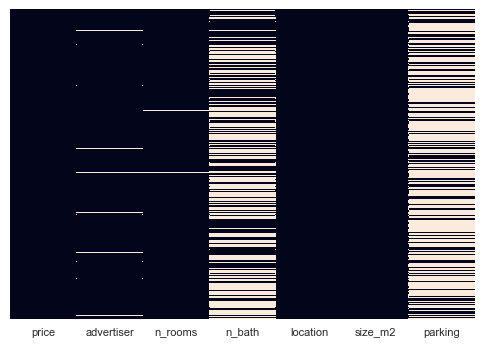

In [255]:
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

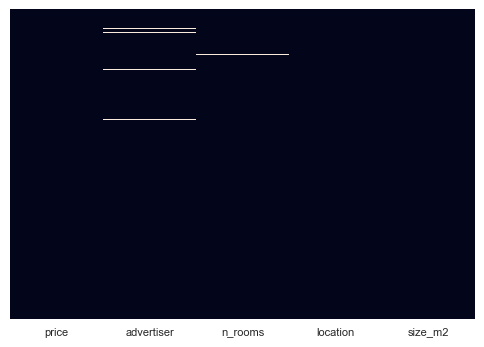

In [256]:
cols = ['price','advertiser','n_rooms','location','size_m2']
dataset = dataset[cols]
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

In [257]:
dataset.dropna(inplace=True)

Change price units to thousand PLN and calculate price per square meter

In [258]:
dataset['price'] = dataset['price']/1000.0
dataset['price_m2'] = dataset['price']/dataset['size_m2']

In [259]:
dataset = dataset[dataset['price_m2']<25.0]

In [260]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25743 entries, 0 to 26402
Data columns (total 6 columns):
price         25743 non-null float64
advertiser    25743 non-null object
n_rooms       25743 non-null float64
location      25743 non-null object
size_m2       25743 non-null float64
price_m2      25743 non-null float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB


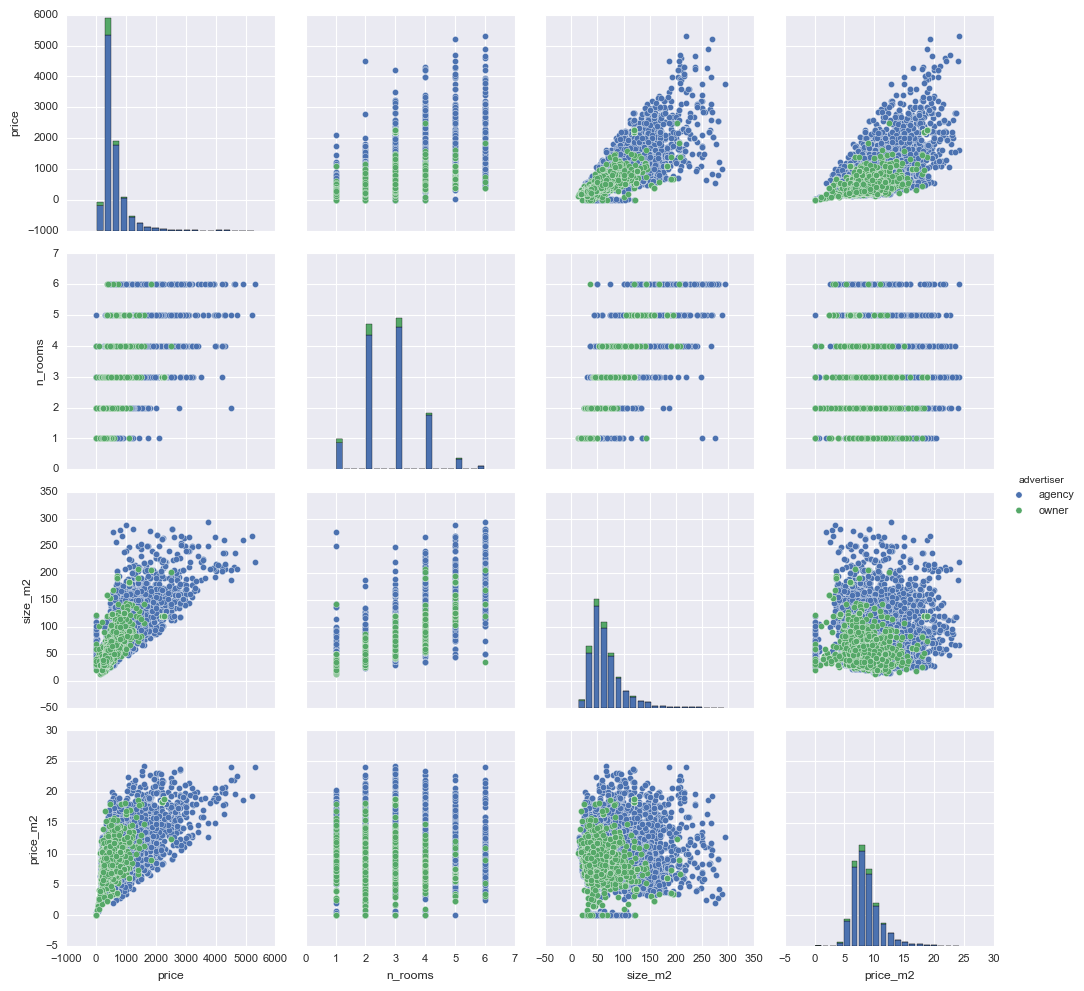

In [261]:
sns.pairplot(dataset,hue='advertiser', diag_kws=dict(bins=20))
plt.show()

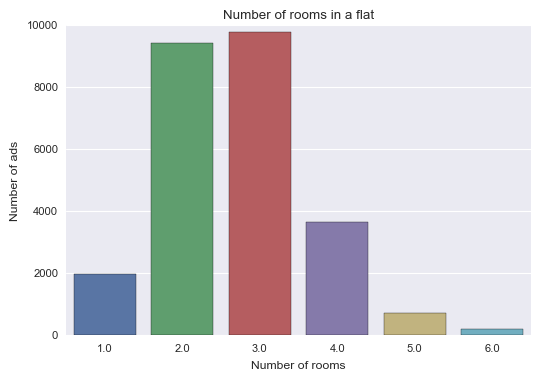

In [262]:
ax = sns.countplot(x='n_rooms',data=dataset)
ax.set(xlabel='Number of rooms', ylabel='Number of ads', title='Number of rooms in a flat')
plt.show()

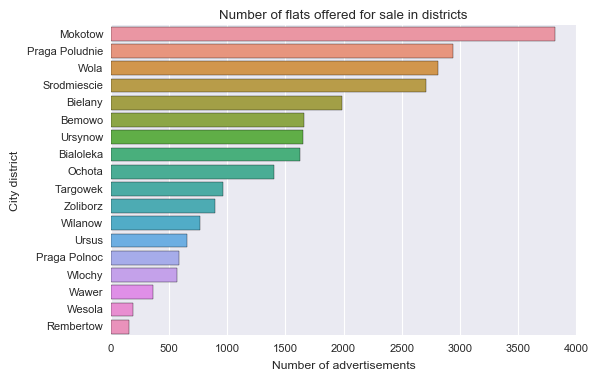

In [295]:
ranks = dataset.groupby('location')['price_m2'].count().sort_values()[::-1].index
ax = sns.countplot(y='location',data=dataset,order=ranks)
ax.set(xlabel='Number of advertisements', ylabel='City district', title='Number of flats offered for sale in districts')
plt.show()

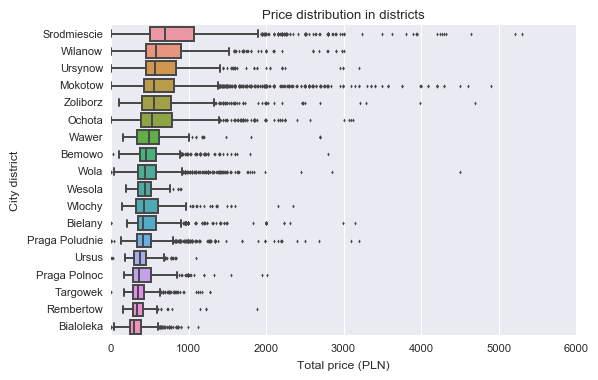

In [293]:
ranks = dataset.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel='Total price (PLN)', ylabel='City district', title='Price distribution in districts')
plt.show()

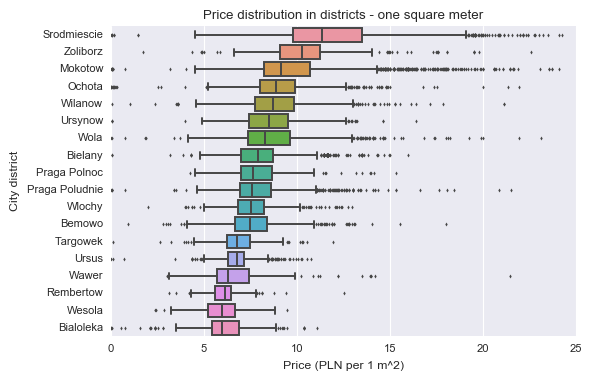

In [294]:
ranks = dataset.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price_m2',fliersize=2, order=ranks)
ax.set(xlabel='Price (PLN per 1 m^2)', ylabel='City district', 
       title='Price distribution in districts - one square meter')
plt.show()

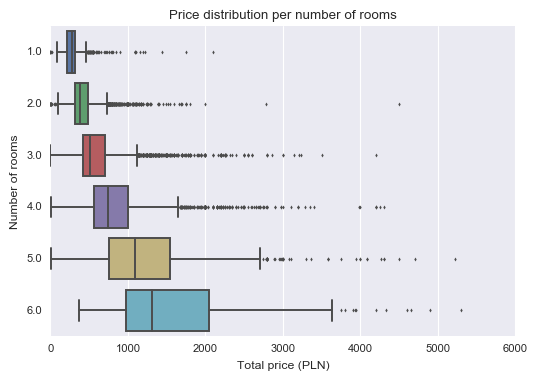

In [266]:
ax = sns.boxplot(data=dataset, y='n_rooms',x='price',fliersize=2,orient='h')
ax.set(xlabel='Total price (PLN)', ylabel='Number of rooms', title='Price distribution per number of rooms')
plt.show()

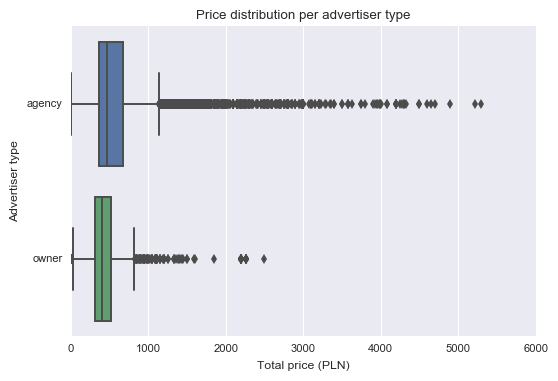

In [267]:
ax = sns.boxplot(data=dataset,y='advertiser',x='price',orient='h')
ax.set(xlabel='Total price (PLN)', ylabel='Advertiser type', title='Price distribution per advertiser type')
plt.show()

In [229]:
location = pd.get_dummies(dataset['location'])
model_dataset = pd.concat([dataset,location],axis=1)
model_dataset.drop(['location','advertiser','price'],axis=1,inplace=True)

In [230]:
model_dataset.head()

,n_rooms,size_m2,price_m2,Bemowo,Bialoleka,Bielany,Mokotow,Ochota,Praga Polnoc,Praga Poludnie,...,Srodmiescie,Targowek,Ursus,Ursynow,Wawer,Wesola,Wilanow,Wlochy,Wola,Zoliborz
0,2.0,47.0,6.489362,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,60.0,6.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,54.0,7.351852,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,51.0,6.686275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,35.0,8.085714,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear regression model

In [231]:
X = model_dataset.drop('price_m2',axis=1)
y = model_dataset['price_m2']

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [234]:
from sklearn.linear_model import LinearRegression

In [235]:
lm = LinearRegression()

In [236]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [237]:
coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])

In [238]:
coeffs.sort_values(by='Coefficient',inplace=True)

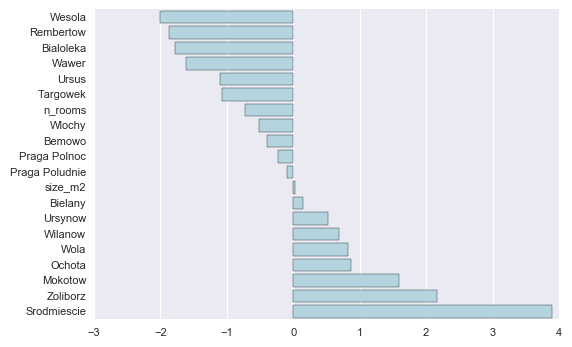

In [239]:
sns.barplot(data=coeffs.transpose(),orient='h',color='lightblue')

In [240]:
pred = lm.predict(X_test)

In [241]:
from sklearn.metrics import r2_score

In [242]:
r2_score(y_test,pred)

0.42640479418982735